# DESCARGA DE DATOS FORMATO NetCDF , PISCO-SENAMHI

<xarray.Dataset>
Dimensions:    (latitude: 400, longitude: 267, z: 13149)
Coordinates:
  * longitude  (longitude) float64 -81.32 -81.27 -81.22 ... -68.12 -68.07 -68.02
  * latitude   (latitude) float64 0.975 0.925 0.875 ... -18.88 -18.93 -18.98
  * z          (z) datetime64[ns] 1981-01-01T12:00:00 ... 2016-12-31T12:00:00
Data variables:
    variable   (z, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.6.2 (http://code.zmaw.de/p...
    Conventions:  CF-1.4
    history:      Thu Oct 12 16:36:49 2017: cdo mergetime /home/senamhi-cesar...
    crs:          +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0...
    crs_format:   PROJ.4
    created_by:   R, packages ncdf4 and raster (version 2.5-8)
    date:         2017-10-12 16:06:21
    CDO:          Climate Data Operators version 1.6.2 (http://code.zmaw.de/p...
xarray.Dataset {
dimensions:
	latitude = 400 ;
	longitude = 267 ;
	z = 13149 ;

variables:
	float64 longitude(longitude) ;

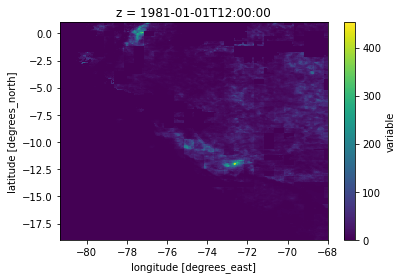

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cftime
import numpy as np

# Data diaria
ds = xr.open_dataset("D:/T_JONA/TESIS_PISCO/Entrada/Pisco_Pp/Precday.nc", engine="netcdf4")

# Data mensual
# ds = xr.open_dataset("D:/T_JONA/TESIS_PISCO/Entrada/Pisco_Pp/PISCOpm.nc", engine="netcdf4",decode_times=False, use_cftime=True)#Para data mensual

# Vemos que contiene la data
print(ds) # (longitude, latitude, z: tiempo, variable: precipitación)
# Información de la data
ds.info()
# Variables de la data
ds.data_vars # variable (z : tiempo (1981-2016), latitude, longitude)
ds["variable"]  
# Dimensiones de la data
ds.dims
# data de coordenadas
ds.coords
# Atributos de la data
ds.attrs
# Seleccione una variable y elija la primera entrada a lo largo del primer eje (tiempo)
ds.variable[0]
# Plot un paso de tiempo
ds.variable[0].plot()

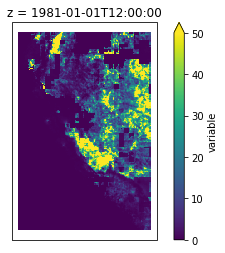

In [2]:
# Plot para un año especifico
precip = ds['variable']
precip
precip_pisco = precip[0]
precip_pisco.plot()

# Valores de la variable 
# print((precip.min()),(precip.max()))

# Plot
ax = plt.axes(projection=ccrs.PlateCarree())
precip_pisco_mm = precip_pisco # precip_pisco_mm = precip_pisco*86400 (para mm/día)
precip_pisco_mm.plot(ax=ax, vmin=0., vmax=50.)

Text(0.5, 1.0, 'Prec')

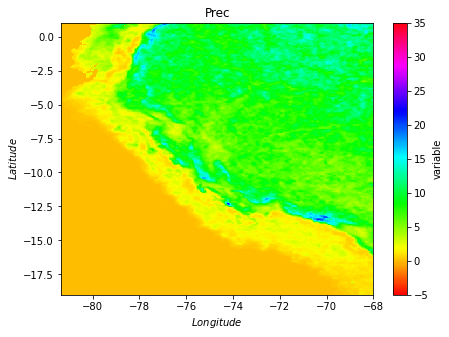

In [3]:
# Plot ; promedio de tiempo de la variable (Precipitación)
clim = ds["variable"].mean("z" , keep_attrs=True)

plt.rcParams['figure.figsize'] = (7, 5)
clim.plot(vmin=-5, vmax=35, cmap='hsv')
plt.xlabel('$Longitude$')
plt.ylabel('$Latitude$')
plt.title("Prec")

In [5]:
# Gráfico por temporadas
# print((clim.max()),(clim.min()))
prec = ds["variable"].groupby('z.season').mean('z', keep_attrs=True)
#print((clim.max()),(clim.min()))

ds['variable'].head()

<xarray.DataArray 'variable' (z: 5, latitude: 5, longitude: 5)>
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -81.32 -81.27 -81.22 -81.17 -81.12
  * latitude   (latitude) float64 0.975 0.925 0.875 0.825 0.775
  * z          (z) datetime64[ns] 1981-01-01T12:00:00 ... 1981-01-05T12:00:00
Attributes:
    long_name:  variable
    min:        [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
    max:        [256.59921865 110.46361458 304.16073608 329.29572332 223.6493...

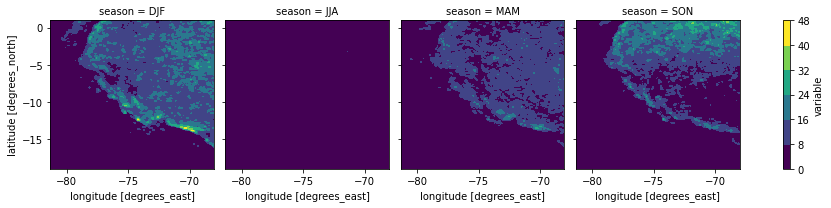

In [6]:
# Plot1
prec.plot.contourf(x='longitude', y='latitude', col='season')

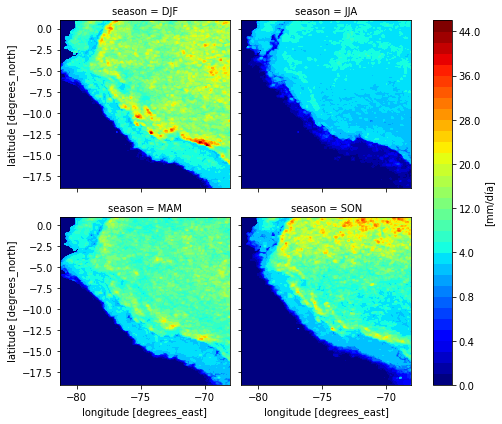

In [7]:
# Plot2
# clim.data = clim.data * 86400 (mm/día)
clim.attrs['units'] = '[mm/día]'
# print((clim.max()),(clim.min()))
cont_levels = np.around(np.concatenate([np.arange(0, 1.1, 0.1), 
                                        np.arange(2, 48, 2)]),
                        decimals=1)
prec.plot.contourf(x='longitude', y='latitude', col='season',cbar_kwargs={'label': clim.units}, 
                       col_wrap=2, levels=cont_levels, cmap='jet')
#plt.savefig("D:/T_JONA/TESIS_PISCO/Entrada/Pisco_Pp/Python_PISCO/season.png",dpi=300)

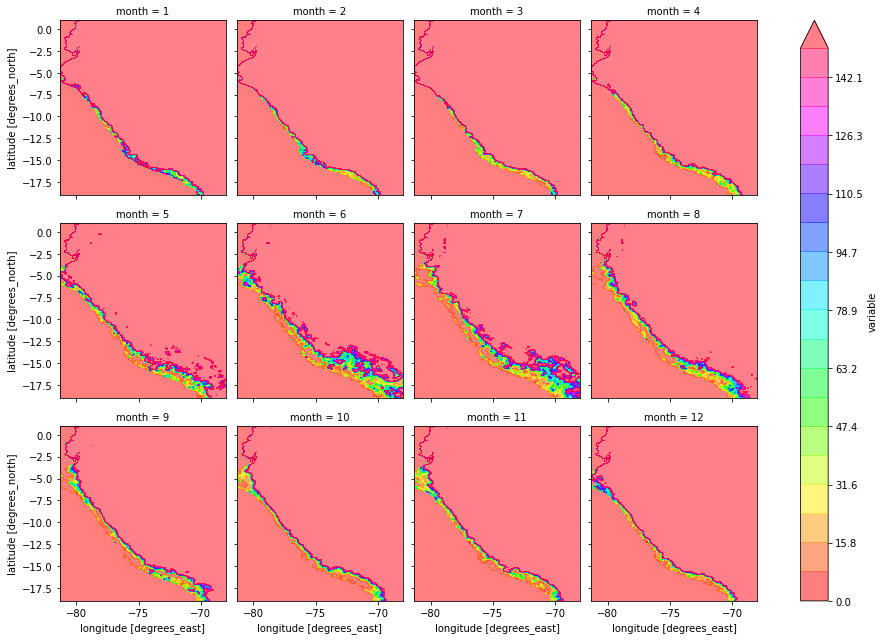

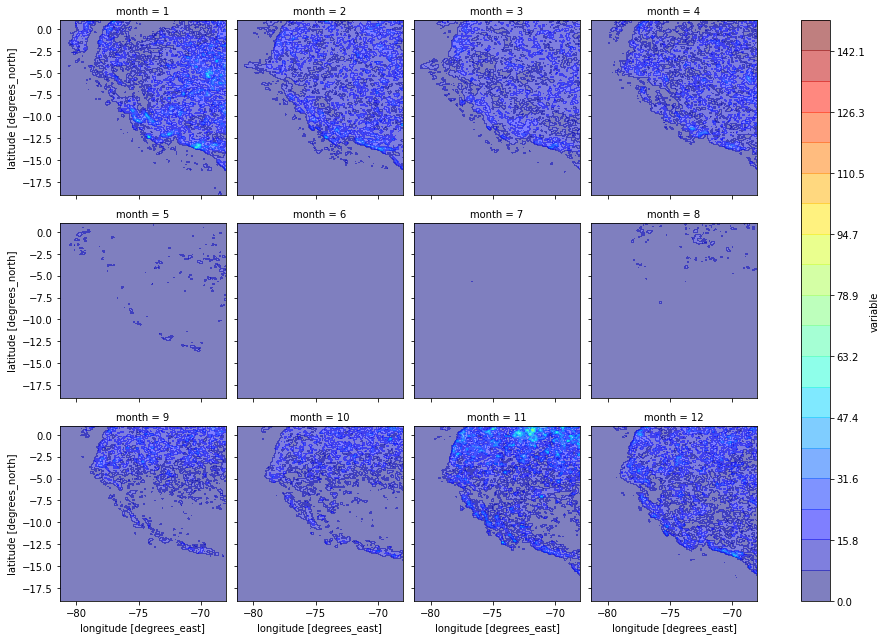

In [8]:
# Gráfico a nivel mensual
# Suma de las precipitaciones en todo el año en mm
sumv=ds['variable'].groupby('z.month').sum(dim="z")
# ¡Tracemos todos los meses con un comando genial! (Para data diaria)
sumv.plot.contourf(row='month', col_wrap=4, vmin=0., vmax=150., alpha=0.5, levels=20, cmap="hsv")

# Promedio de las precipitaciones en todo el año en mm
meanv=ds['variable'].groupby('z.month').mean(dim="z")
# ¡Tracemos todos los meses con un comando genial!
meanv.plot.contourf(row='month', col_wrap=4, vmin=0., vmax=150., alpha=0.5, levels=20, cmap="jet")

In [9]:
# Descarga de datos de la variable (precipitación) para la ubicación de las estaciones
# Crear un diccionario
locs = [
    {'nombre': 'Est_V1', 'longitude': -74.063, 'latitude': -12.958},
    {'nombre': 'Est_V2', 'longitude': -74.375, 'latitude': -12.958},
    {'nombre': 'Est_V3', 'longitude': -74.063, 'latitude': -13.270},
    {'nombre': 'Est_V4', 'longitude': -74.375, 'latitude': -13.270},
    {'nombre': 'Est_V5', 'longitude': -74.688, 'latitude': -13.270},
    {'nombre': 'Est_V6', 'longitude': -74.063, 'latitude': -13.582},
    {'nombre': 'Est_V7', 'longitude': -74.375, 'latitude': -13.582},
    {'nombre': 'Est_V8', 'longitude': -74.688, 'latitude': -13.582},
]    

# Ubicamos la data
prec = xr.Dataset()
prec_ds = ds

# Crear un conjunto de datos que contiene los valores de Precipitación para cada ubicación
for l in locs:
    nombre = l['nombre']
    longitude = l['longitude']
    latitude = l['latitude']
    var_name = nombre

    ds2 = prec_ds .sel(longitude=longitude, latitude=latitude, method='nearest')

    longitude_attr = '%s_longitude' % nombre
    latitude_attr = '%s_latitude' % nombre

    ds2.attrs[longitude_attr] = ds2.longitude.values.tolist()
    ds2.attrs[latitude_attr] = ds2.latitude.values.tolist()
    ds2 = ds2.rename({'variable' : var_name}).drop(('latitude', 'longitude'))

    prec = xr.merge([prec, ds2], compat='override')

prec.data_vars

Data variables:
    Est_V1   (z) float32 0.6648 0.0 2.742 0.3582 2.87 ... 1.752 1.281 2.357 9.27
    Est_V2   (z) float32 6.06 7.651 13.39 2.401 ... 2.356 3.608 3.456 12.41
    Est_V3   (z) float32 0.364 2.068 5.119 1.1 9.497 ... 2.639 2.499 5.157 11.91
    Est_V4   (z) float32 0.3359 0.4962 3.489 2.232 ... 0.7969 3.246 3.642 8.724
    Est_V5   (z) float32 0.2801 2.908 3.753 6.167 ... 0.6142 4.391 4.901 12.6
    Est_V6   (z) float32 0.2139 8.364 7.986 1.07 ... 6.414 4.611 15.2 20.02
    Est_V7   (z) float32 0.1781 0.9421 2.105 2.227 ... 2.763 6.362 7.114 11.03
    Est_V8   (z) float32 0.211 1.793 2.314 4.27 ... 0.699 5.963 4.847 9.772

Text(0.01, 0.98, 'Cuenca Cachi')

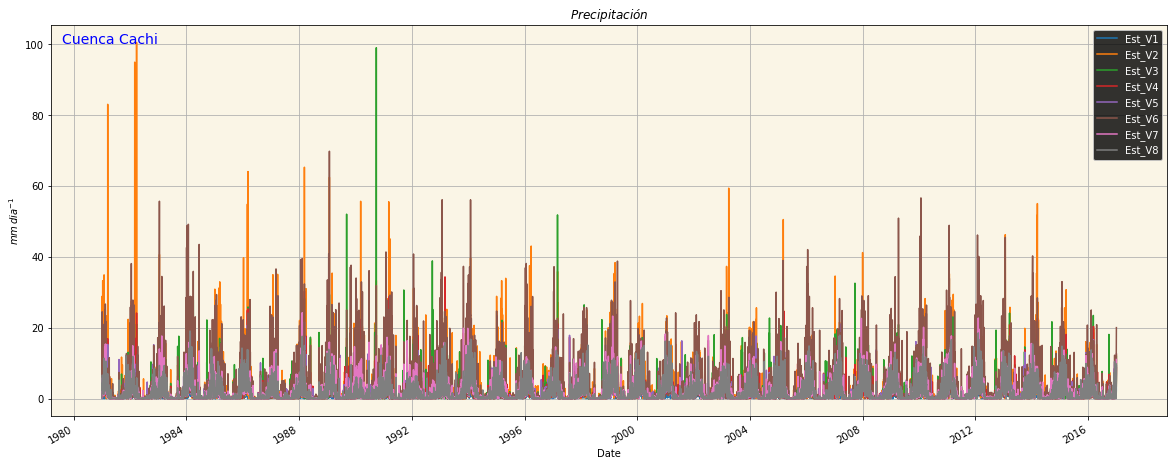

In [10]:
# Convertir a DataFrame
df_f = prec.to_dataframe() # Precipitación diaria
#df_f.describe()
# Plot 1
ax = df_f.plot(figsize=(20, 8), title="$Precipitación$", grid=2)
ax.set(xlabel='Date', ylabel='$mm\,dia^{-1}$')
#plt.axhline(y=20, c='gray', ls=':')
#plt.axvline(x=1995, c='gray', ls='--')
#plt.axvline(x=1989, c='gray', ls='--')
leg = plt.legend(facecolor='black', framealpha=0.8)
for text in leg.get_texts():
    plt.setp(text, color = 'w')
ax = plt.gca()
ax.set_facecolor('#faf5e6')
plt.text(0.01, 0.98 ,"Cuenca Cachi", fontsize=14, transform=ax.transAxes, verticalalignment='top', color='blue')

# Guardar datos!!!
#df_f.to_csv("D:/T_JONA/TESIS_PISCO/Entrada/Pisco_Pp/Python_PISCO/piscopd_2022.csv", index=True)

Text(0, 0.5, '')

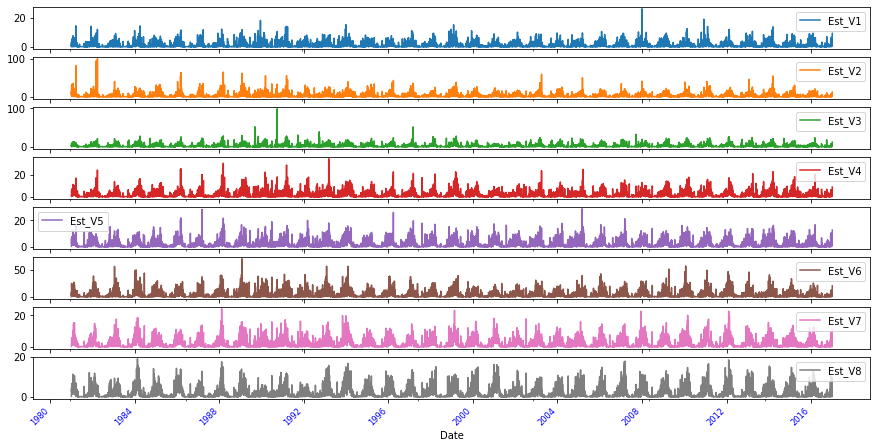

In [11]:
# Plot 2
plt.rcParams["figure.figsize"] = (15,8) # Ancho*Altura
df_f.plot(subplots=True); plt.legend(loc="best")
plt.xticks(size="small",color="blue", rotation = 45)
plt.xlabel("Date")
plt.ylabel("")

Text(0.5, 0, 'Date')

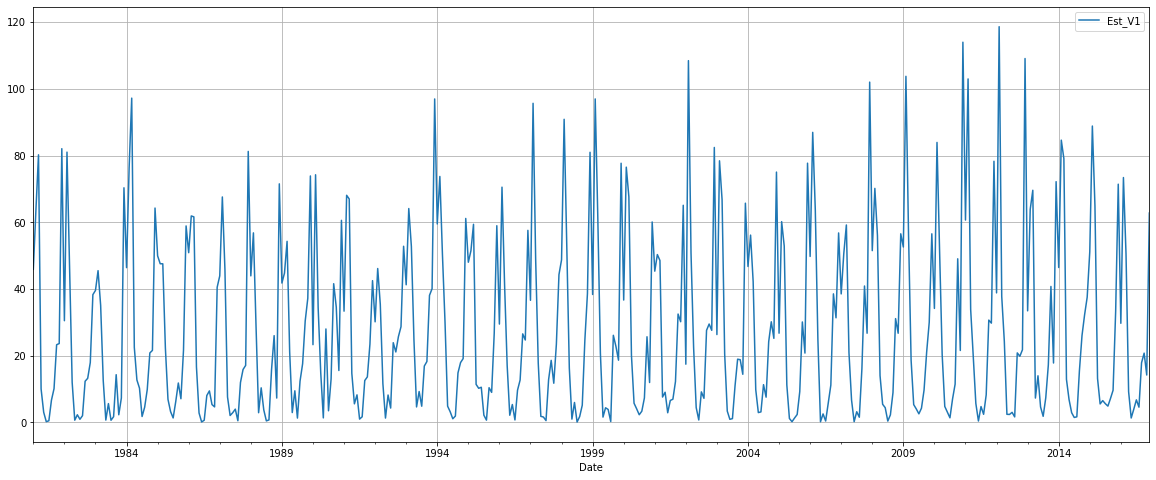

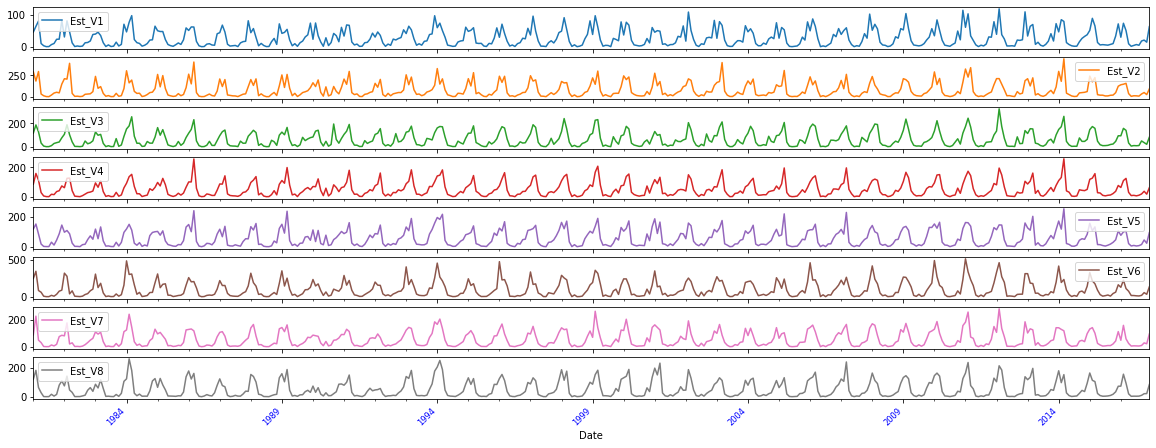

In [12]:
# ''' Obtener data mensual, Pmáx24hr, anual; a partir de la data diaría (Estaciones meteorologicas observadas!!!!)'''
# ''' Si desea la data mensual,... del producto PISCO, utilice el formato NetCDF de la data mensual!!! '''

pp_mensual= df_f.resample(rule="M").sum() # Precipitación mensual a partir de la data diaria
pp_max24 = df_f.resample(rule="A").max()  # Precipitación máxima 24hr
pp_anual = df_f.resample(rule="A").sum()  # Precipitación anual
#pp_max24.head()

# Plot 1
# Plot para una estación
plt.rcParams["figure.figsize"] = (20,8)
pp_mensual["Est_V1"].plot(grid=True).set_title(""); plt.legend(loc="best")
plt.xlabel("Date")

# Plot para las estaciones
pp_mensual.plot(subplots=True); plt.legend(loc="best")
plt.xticks(size="small",color="blue", rotation = 45)
plt.xlabel("Date")
#plt.ylabel("Precipitacion (mm/mensual)")

#pp_mensual.to_csv("D:/T_JONA/TESIS_PISCO/Entrada/Pisco_Pp/Python_PISCO/Pmensual_2022.csv", index=True)

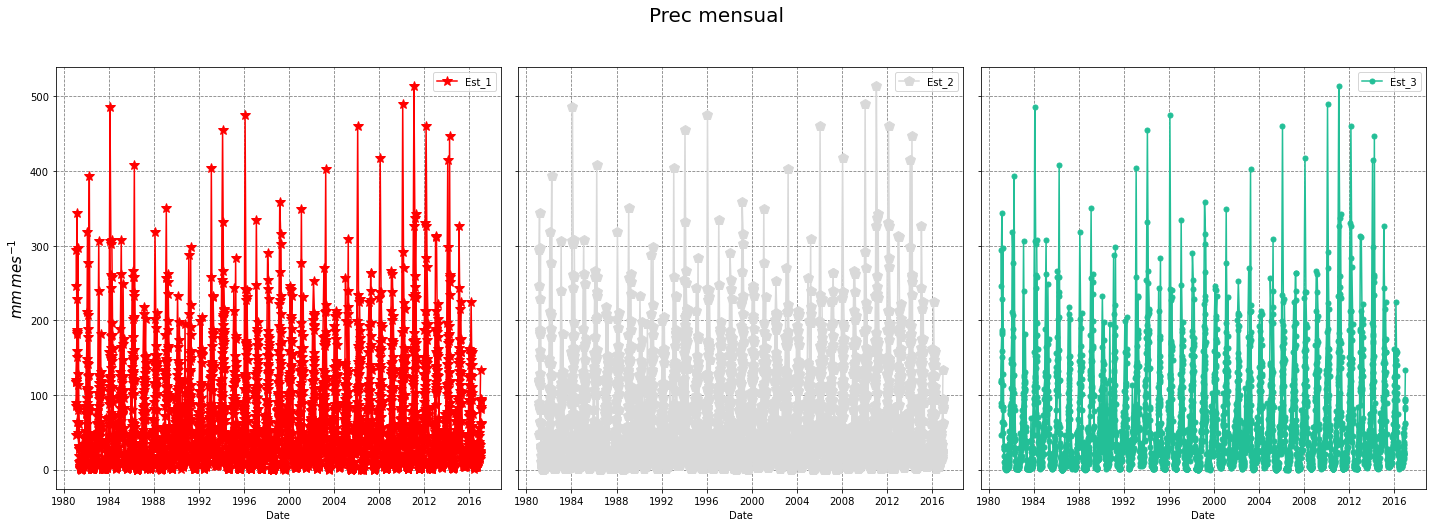

In [14]:
# Plot 2
fig, ax= plt.subplots(1, 3, figsize=(20,7),sharey=True) # 1 fila * 3 columnas
ax[0].plot(pp_mensual,color='red',marker='*',markersize=10)
ax[0].legend(['Est_1'],loc='upper right', frameon=True)
ax[0].set_xlabel('Date')
ax[0].grid('on', color='.5',linestyle='--')
ax[0].set_ylabel('$mm\,mes^{-1}$',fontsize=15)
ax[1].plot(pp_mensual,marker='p',color='.85',markersize=10)
ax[1].legend(['Est_2'],loc='upper right', frameon=True)
ax[1].set_xlabel('Date')
ax[1].grid('on', color='.5',linestyle='--')
ax[2].plot(pp_mensual,marker='.',color='#23bf97',markersize=10)
ax[2].legend(['Est_3'],loc='upper right', frameon=True)
ax[2].set_xlabel('Date')
ax[2].grid('on', color='.5',linestyle='--')# ....añadir mas estaciones!!!
plt.suptitle('Prec mensual',y=1.04,fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
# Pruebe con la data de temperatura!!!